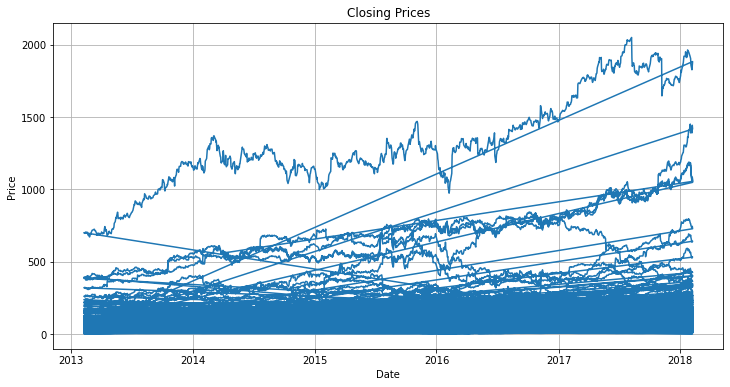

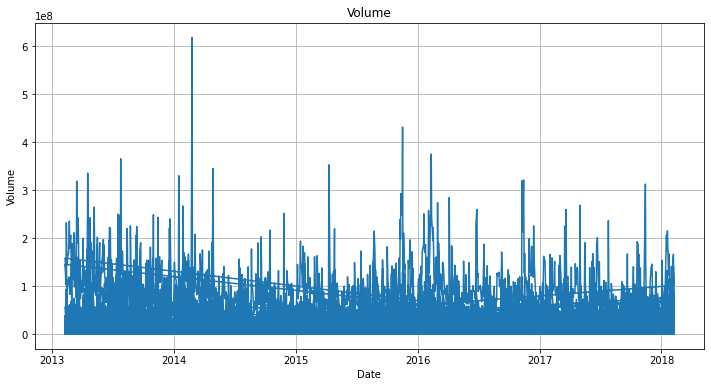

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('C:\\Users\\91914\\Downloads\\STOCKDATA\\all_stocks_5yr.csv')

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Calculate daily price change
df['price_change'] = df['close'] - df['open']

# Calculate daily price percentage change
df['price_change_pct'] = (df['close'] - df['open']) / df['open'] * 100

# Calculate rolling mean (e.g., 30-day moving average) of closing prices
df['rolling_mean'] = df['close'].rolling(window=30).mean()

# Plotting closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'])
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Plotting volume
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['volume'])
plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Perform statistical analysis
statistics = df.describe()

# Group data by 'Name' and calculate summary statistics
grouped_data = df.groupby('Name').agg({'close': ['mean', 'max', 'min'], 'volume': 'sum'})

# Perform correlation analysis
correlation = df[['open', 'high', 'low', 'close', 'volume']].corr()

# ... Perform other analysis tasks as per your requirements ...



In [15]:
# Calculate daily returns
df['daily_returns'] = df['close'].pct_change()


In [16]:
# Calculate cumulative returns
df['cumulative_returns'] = (1 + df['daily_returns']).cumprod() - 1


c:\users\91914\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


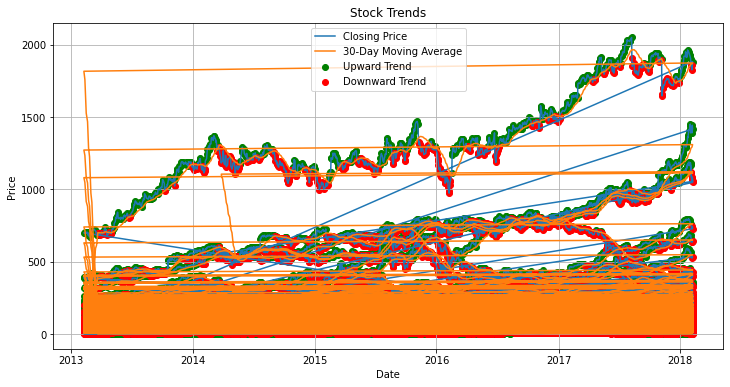

In [17]:
# Smooth the closing prices using a moving average
window_size = 30
df['moving_average'] = df['close'].rolling(window=window_size).mean()

# Identify and label upward and downward trends
df['trend'] = 'None'
df.loc[df['close'] > df['moving_average'], 'trend'] = 'Upward'
df.loc[df['close'] < df['moving_average'], 'trend'] = 'Downward'

# Plotting trends
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Closing Price')
plt.plot(df['date'], df['moving_average'], label=f'{window_size}-Day Moving Average')
plt.scatter(df[df['trend'] == 'Upward']['date'], df[df['trend'] == 'Upward']['close'], color='green', label='Upward Trend')
plt.scatter(df[df['trend'] == 'Downward']['date'], df[df['trend'] == 'Downward']['close'], color='red', label='Downward Trend')
plt.title('Stock Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# Calculate volatility (standard deviation of daily returns)
volatility = df['daily_returns'].std()


c:\users\91914\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


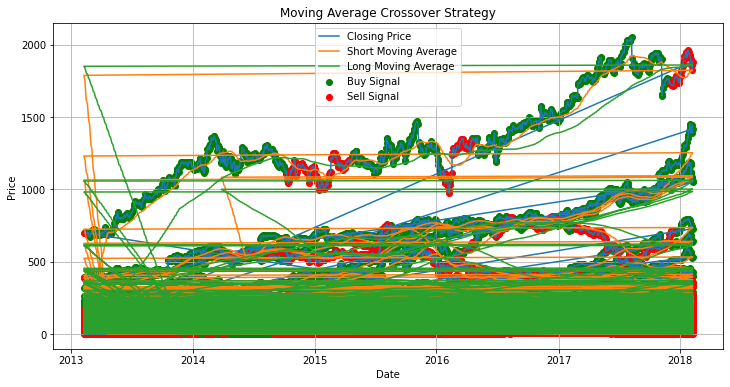

In [19]:
# Create a new DataFrame for strategy
strategy_df = pd.DataFrame()
strategy_df['date'] = df['date']
strategy_df['close'] = df['close']
strategy_df['short_moving_avg'] = df['close'].rolling(window=50).mean()
strategy_df['long_moving_avg'] = df['close'].rolling(window=200).mean()

# Generate trading signals
strategy_df['signal'] = 0
strategy_df.loc[strategy_df['short_moving_avg'] > strategy_df['long_moving_avg'], 'signal'] = 1
strategy_df.loc[strategy_df['short_moving_avg'] < strategy_df['long_moving_avg'], 'signal'] = -1

# Visualize trading signals
plt.figure(figsize=(12, 6))
plt.plot(strategy_df['date'], strategy_df['close'], label='Closing Price')
plt.plot(strategy_df['date'], strategy_df['short_moving_avg'], label='Short Moving Average')
plt.plot(strategy_df['date'], strategy_df['long_moving_avg'], label='Long Moving Average')
plt.scatter(strategy_df[strategy_df['signal'] == 1]['date'], strategy_df[strategy_df['signal'] == 1]['close'], color='green', label='Buy Signal')
plt.scatter(strategy_df[strategy_df['signal'] == -1]['date'], strategy_df[strategy_df['signal'] == -1]['close'], color='red', label='Sell Signal')
plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
